KNN - K-Nearest Neighbors Algorithm

It is a simple and widely used classification and regression algorithm used in machine learning. Mostly, it is used for classification.

Here, we are going to discuss about classification.

A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification  that
estimates how likely a data point is to be a member of one group or the other depending on what group
the data points nearest to it are in.


− Load the training as well as test data.

− Choose the value of K i.e. the nearest data points. K can be any integer.

− For each point in the test data do the following −

  − Calculate the distance between test data and each row of training data points with the help of any of the methods,
           namely: Euclidean, Manhattan or Hamming distance. The most commonly used method to calculate distance is Euclidean.

  − Based on the distance value, sort the data points in ascending order.

  − Choose the top K rows from the sorted array.

  − It will assign a class/category to the test data point based on most frequent class/category of these K rows.


In [211]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [212]:
size = 10
np.random.seed(2)
x = random.sample(range(1, size+1), size)
x

[6, 5, 2, 8, 7, 9, 10, 4, 3, 1]

In [213]:
y = random.sample(range(1, size+1), size)
y

[1, 7, 6, 5, 3, 8, 9, 2, 10, 4]

In [214]:
g = np.random.randint(1,3,size)
g

array([1, 2, 2, 1, 1, 2, 1, 2, 1, 2])

In [215]:
df = pd.DataFrame(list(zip(x,y,g)), columns=['x','y', 'grp'] )
df

,x,y,grp
0,6,1,1
1,5,7,2
2,2,6,2
3,8,5,1
4,7,3,1
5,9,8,2
6,10,9,1
7,4,2,2
8,3,10,1
9,1,4,2


In [216]:
np.random.seed(1)
sample_x, sample_y   = np.random.randint(1,size,2)
sample_x, sample_y

(6, 9)

In [210]:
K=3
K

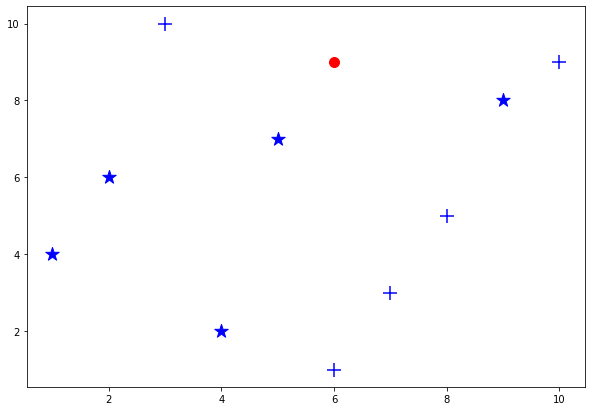

In [217]:
fig = 'plt.figure(figsize=(10,7))'
exec(fig)
m = ['+' if i==1 else '*' for i in df.grp]

data = list(zip(df.x, df.y, m))

for x, y, m in data :
    plt.scatter(x, y, marker=m, c='b', s=200)
plt.scatter(sample_x, sample_y, s=100, c='r')
plt.show()


In [218]:
df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
df

,x,y,grp,dist
0,6,1,1,8.000000
1,5,7,2,2.236068
2,2,6,2,5.000000
3,8,5,1,4.472136
4,7,3,1,6.082763
5,9,8,2,3.162278
6,10,9,1,4.000000
7,4,2,2,7.280110
8,3,10,1,3.162278
9,1,4,2,7.071068


In [219]:
df = df.sort_values('dist').reset_index(drop=True)
df

,x,y,grp,dist
0,5,7,2,2.236068
1,9,8,2,3.162278
2,3,10,1,3.162278
3,10,9,1,4.000000
4,8,5,1,4.472136
5,2,6,2,5.000000
6,7,3,1,6.082763
7,1,4,2,7.071068
8,4,2,2,7.280110
9,6,1,1,8.000000


In [220]:
df_nn      = df.loc[:K-1]
df_nn

,x,y,grp,dist
0,5,7,2,2.236068
1,9,8,2,3.162278
2,3,10,1,3.162278


In [221]:
df_g = df_nn.loc[df_nn.grp==df_nn['grp'].value_counts().index[0]].reset_index(drop=True)
df_g

,x,y,grp,dist
0,5,7,2,2.236068
1,9,8,2,3.162278


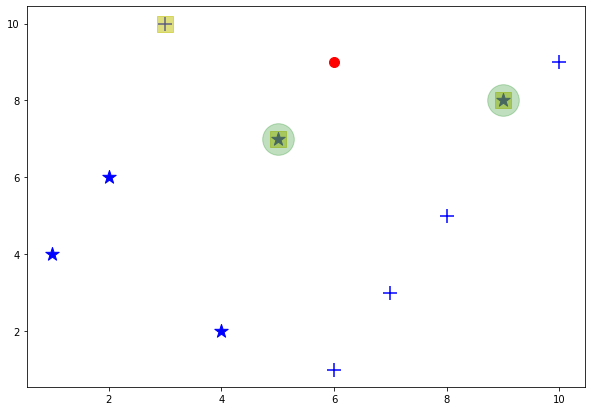

   x  y  grp      dist
0  5  7    2  2.236068
1  9  8    2  3.162278


In [226]:
fig = 'plt.figure(figsize=(10,7))'
exec(fig)
for x, y, m in data :
    plt.scatter(x, y, marker=m, c='b', s=200)
plt.scatter(df_nn.x, df_nn.y, marker='s', c='y', s=250, alpha=.5)
plt.scatter(df_g.x, df_g.y, marker='o', s=1000, c='g', alpha=.25)
plt.scatter(sample_x, sample_y, s=100, c='r')
plt.show()
print(df_g)

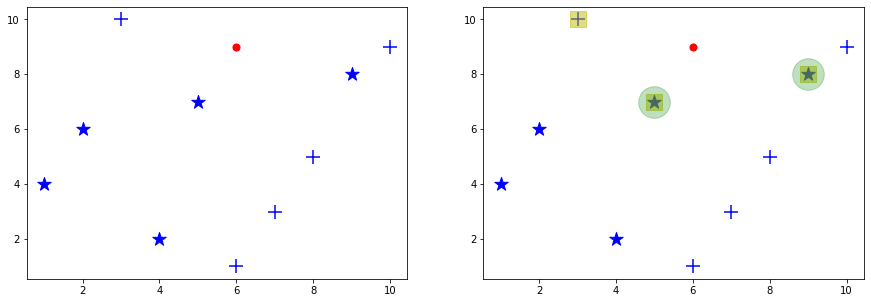

In [227]:
# consolidated commands :

fig = plt.figure(figsize=(15,5))
ax = fig.subplots(1, 2)

m = ['+' if i==1 else '*' for i in df.grp]

data = list(zip(df.x, df.y, m))

for x, y, m in data :
    ax[0].scatter(x, y, marker=m, c='b', s=200)
ax[0].scatter(sample_x, sample_y, s=50, c='r')
df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
df_sorted  = df.sort_values('dist').reset_index(drop=True)
df_nn       = df_sorted.loc[:K-1]
df_g      = df_nn.loc[df_nn.grp==df_nn['grp'].value_counts().index[0]].reset_index(drop=True)

for x, y, m in data :
    ax[1].scatter(x, y, marker=m, c='b', s=200)
ax[1].scatter(df_nn.x, df_nn.y, marker='s', c='y', s=250, alpha=.5)
ax[1].scatter(df_g.x, df_g.y, marker='o', s=1000, c='g', alpha=.25)
ax[1].scatter(sample_x, sample_y, s=50, c='r')
plt.show()

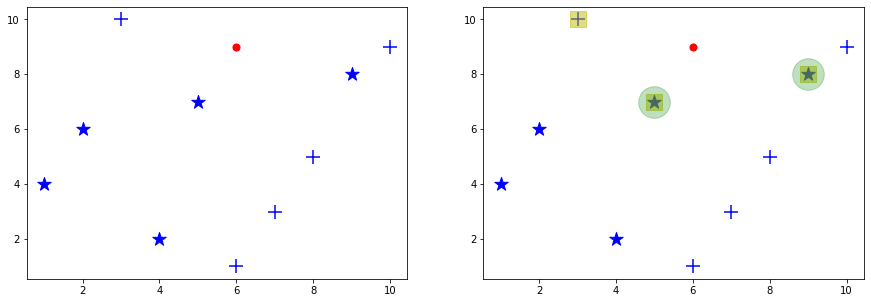

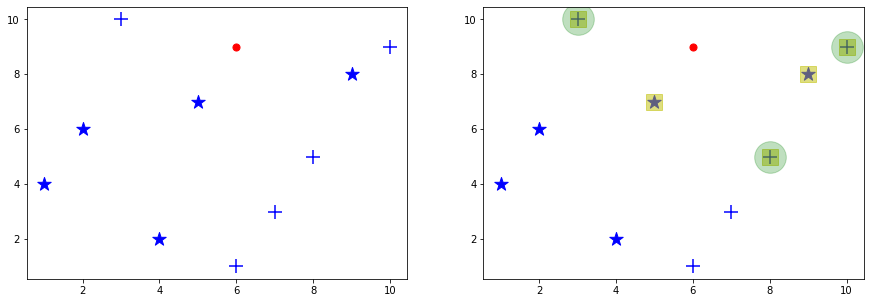

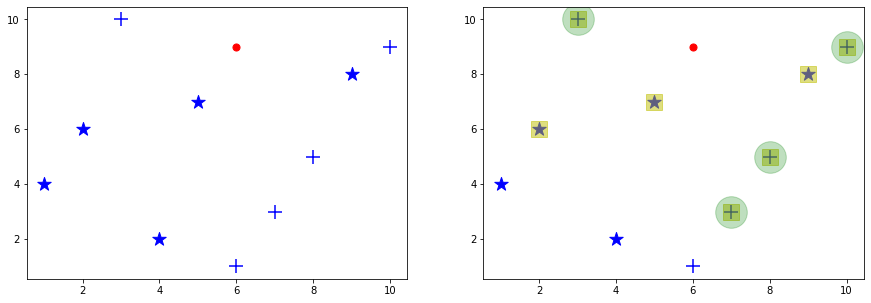

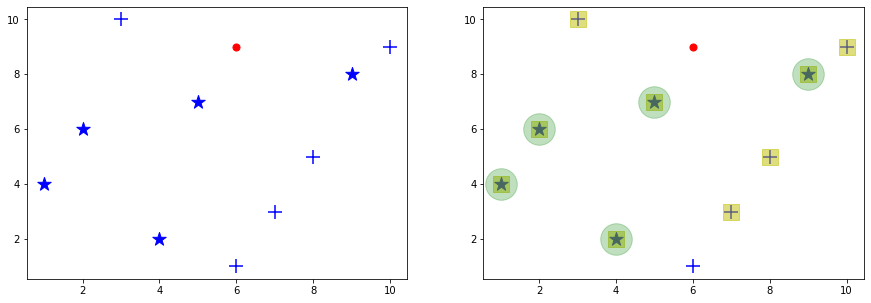

In [228]:
# Determining classification using different K-values

for K in [3,5,7,9] :
    fig = plt.figure(figsize=(15,5))
    ax = fig.subplots(1, 2)

    m = ['+' if i==1 else '*' for i in df.grp]

    data = list(zip(df.x, df.y, m))

    for x, y, m in data :
        ax[0].scatter(x, y, marker=m, c='b', s=200)
    ax[0].scatter(sample_x, sample_y, s=50, c='r')
    df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
    df_sorted  = df.sort_values('dist').reset_index(drop=True)
    df_nn       = df_sorted.loc[:K-1]
    df_g      = df_nn.loc[df_nn.grp==df_nn['grp'].value_counts().index[0]].reset_index(drop=True)

    for x, y, m in data :
        ax[1].scatter(x, y, marker=m, c='b', s=200)
    ax[1].scatter(df_nn.x, df_nn.y, marker='s', c='y', s=250, alpha=.5)
    ax[1].scatter(df_g.x, df_g.y, marker='o', s=1000, c='g', alpha=.25)
    ax[1].scatter(sample_x, sample_y, s=50, c='r')
    plt.show()

K: 3
    x   y  grp      dist
0  18  49    2  4.123106
1  11  42    2  6.708204


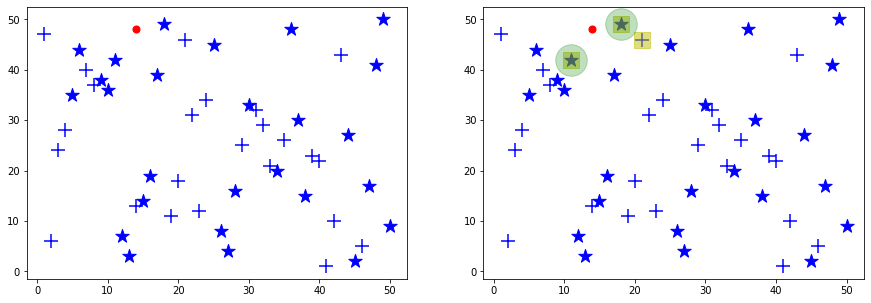

K: 5
    x   y  grp      dist
0  18  49    2  4.123106
1  11  42    2  6.708204
2   6  44    2  8.944272
3  17  39    2  9.486833


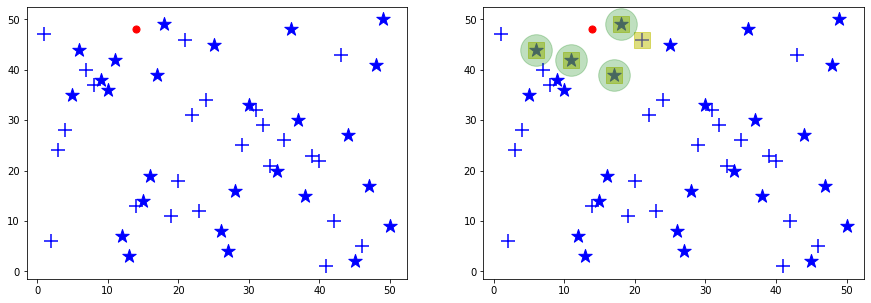

K: 7
    x   y  grp       dist
0  18  49    2   4.123106
1  11  42    2   6.708204
2   6  44    2   8.944272
3  17  39    2   9.486833
4   9  38    2  11.180340


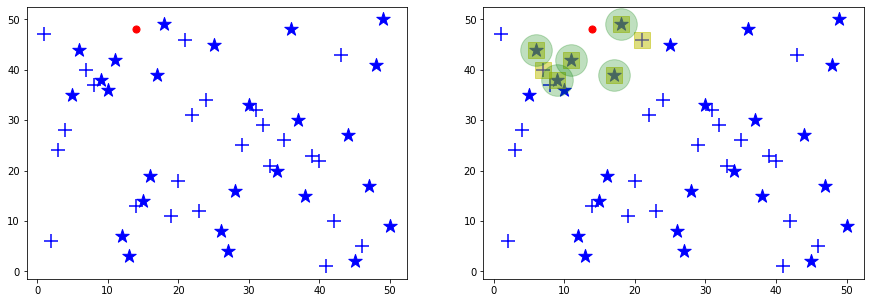

K: 9
    x   y  grp       dist
0  18  49    2   4.123106
1  11  42    2   6.708204
2   6  44    2   8.944272
3  17  39    2   9.486833
4   9  38    2  11.180340
5  25  45    2  11.401754


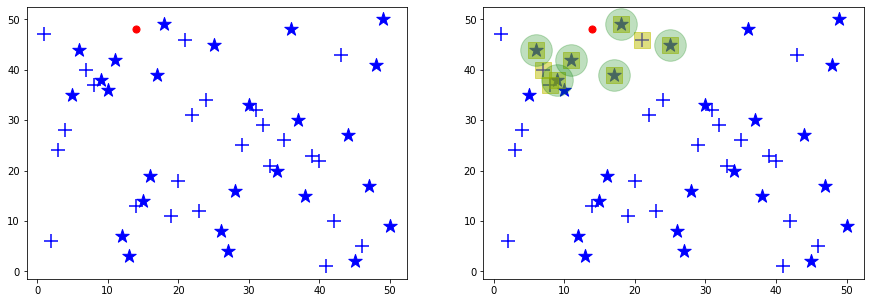

K: 11
    x   y  grp       dist
0  18  49    2   4.123106
1  11  42    2   6.708204
2   6  44    2   8.944272
3  17  39    2   9.486833
4   9  38    2  11.180340
5  25  45    2  11.401754
6  10  36    2  12.649111


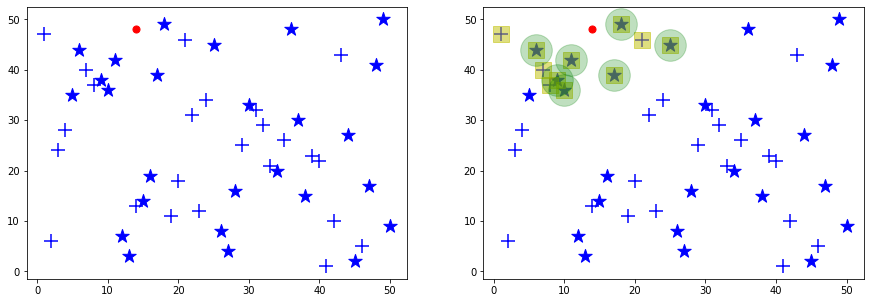

In [229]:
# more training data points

size = 50
x = random.sample(range(1, size+1), size)
y = random.sample(range(1, size+1), size)
g = np.random.randint(1,3,size)
df = pd.DataFrame(list(zip(x,y,g)), columns=['x','y', 'grp'] )

sample_x, sample_y   = np.random.randint(1,size,2)


for K in [3,5,7,9,11] :
    fig = plt.figure(figsize=(15,5))
    ax = fig.subplots(1, 2)

    m = ['+' if i==1 else '*' for i in df.grp]

    data = list(zip(df.x, df.y, m))

    for x, y, m in data :
        ax[0].scatter(x, y, marker=m, c='b', s=200)
    ax[0].scatter(sample_x, sample_y, s=50, c='r')
    df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
    df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
    df_sorted  = df.sort_values('dist').reset_index(drop=True)
    df_nn       = df_sorted.loc[:K-1]
    df_g      = df_nn.loc[df_nn.grp==df_nn['grp'].value_counts().index[0]].reset_index(drop=True)

    for x, y, m in data :
        ax[1].scatter(x, y, marker=m, c='b', s=200)
    ax[1].scatter(df_nn.x, df_nn.y, marker='s', c='y', s=250, alpha=.5)
    ax[1].scatter(df_g.x, df_g.y, marker='o', s=1000, c='g', alpha=.25)
    ax[1].scatter(sample_x, sample_y, s=50, c='r')
    print('K:', K)
    print(df_g)
    plt.show()

K: 3
    x   y  grp      dist
0   4  25    2  7.071068
1  18  21    2  7.615773


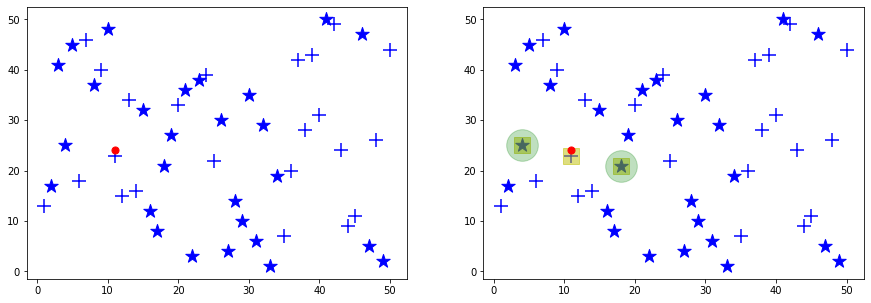

K: 5
    x   y  grp      dist
0   4  25    2  7.071068
1  18  21    2  7.615773
2  19  27    2  8.544004


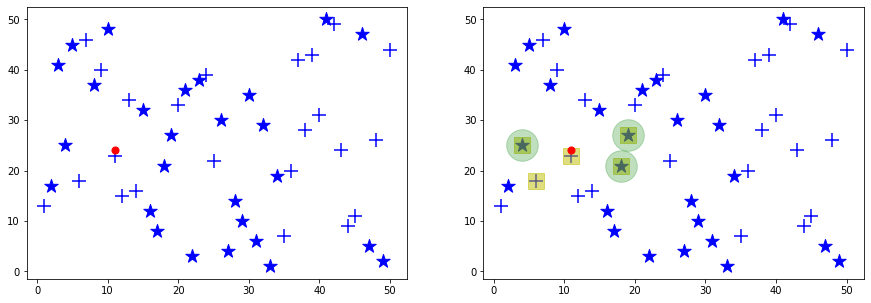

K: 7
    x   y  grp      dist
0   4  25    2  7.071068
1  18  21    2  7.615773
2  19  27    2  8.544004
3  15  32    2  8.944272


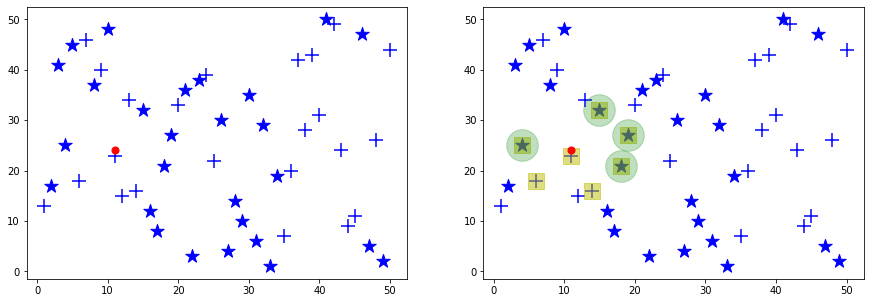

K: 9
    x   y  grp       dist
0  11  23    1   1.000000
1   6  18    1   7.810250
2  14  16    1   8.544004
3  12  15    1   9.055385
4  13  34    1  10.198039


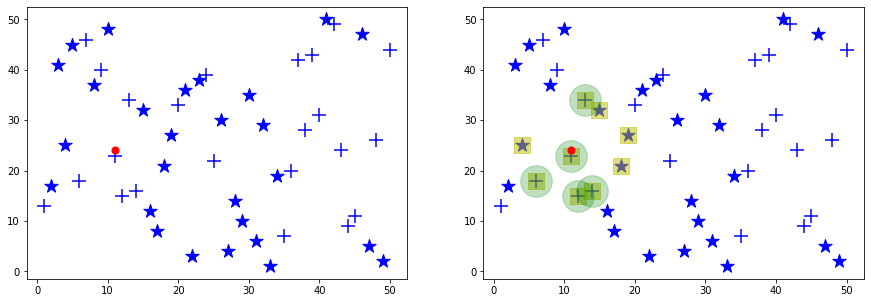

K: 11
    x   y  grp       dist
0  11  23    1   1.000000
1   6  18    1   7.810250
2  14  16    1   8.544004
3  12  15    1   9.055385
4  13  34    1  10.198039
5  20  33    1  12.727922


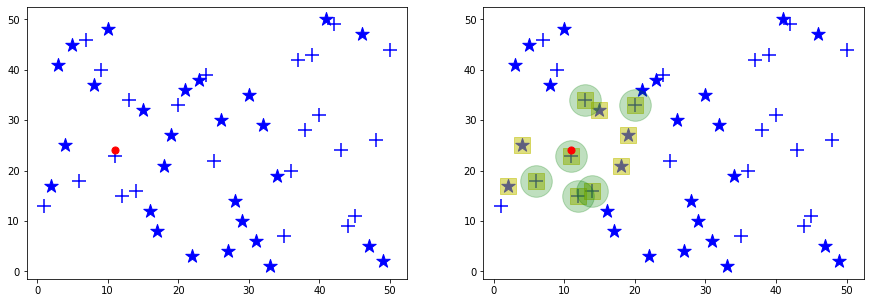

In [230]:
# more training data points

size = 50
x = random.sample(range(1, size+1), size)
y = random.sample(range(1, size+1), size)
g = np.random.randint(1,3,size)
df = pd.DataFrame(list(zip(x,y,g)), columns=['x','y', 'grp'] )

sample_x, sample_y   = np.random.randint(1,size,2)


for K in [3,5,7,9,11] :
    fig = plt.figure(figsize=(15,5))
    ax = fig.subplots(1, 2)

    m = ['+' if i==1 else '*' for i in df.grp]

    data = list(zip(df.x, df.y, m))

    for x, y, m in data :
        ax[0].scatter(x, y, marker=m, c='b', s=200)
    ax[0].scatter(sample_x, sample_y, s=50, c='r')
    df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
    df['dist'] = np.sqrt(np.power(df.x-sample_x,2)+np.power(df.y-sample_y,2))
    df_sorted  = df.sort_values('dist').reset_index(drop=True)
    df_nn       = df_sorted.loc[:K-1]
    df_g      = df_nn.loc[df_nn.grp==df_nn['grp'].value_counts().index[0]].reset_index(drop=True)

    for x, y, m in data :
        ax[1].scatter(x, y, marker=m, c='b', s=200)
    ax[1].scatter(df_nn.x, df_nn.y, marker='s', c='y', s=250, alpha=.5)
    ax[1].scatter(df_g.x, df_g.y, marker='o', s=1000, c='g', alpha=.25)
    ax[1].scatter(sample_x, sample_y, s=50, c='r')
    print('K:', K)
    print(df_g)
    plt.show()